TAREA: Crea una imagen, p.e. de 800x800 píxeles, con la textura del tablero de ajedrez

In [2]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

In [50]:
#Se define el tamaño de la imagen
size = 800

In [51]:
#Se crea la imagen con todos los valores a 0 y un canal (escala de grises)
table = np.zeros((size, size, 1), dtype=np.uint8)

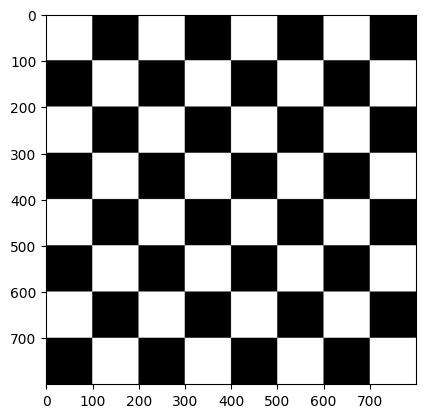

In [52]:
# Dibujar el tablero de ajedrez

#Bucle anidado para recorrer las "casillas" que equivales a 100x100 pixeles en la imagen
for i in range(8):
    for j in range(8):
        
        #Condición para pintar de blanco la casilla
        if (i + j) % 2 == 0:
            table[i*100:(i+1)*100, j*100:(j+1)*100] = 255

# Mostrar la imagen
plt.imshow(table, cmap='gray')



TAREA: Crear una imagen estilo Mondrian (un ejemplo https://www3.gobiernodecanarias.org/medusa/ecoescuela/sa/2017/04/17/descubriendo-a-mondrian/ ) con las funciones de dibujo de OpenCV

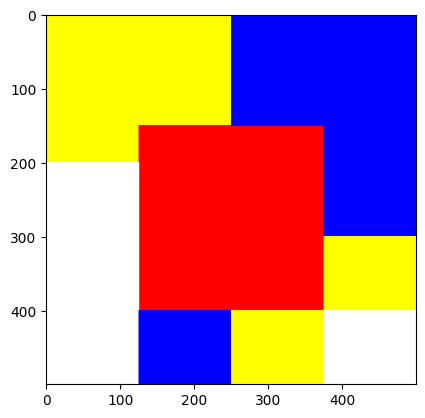

In [53]:
moondrial = np.zeros((500,500,3), dtype=np.uint8)

#Forma amarilla esquina superior izquierda
cv2.rectangle(moondrial,(0,0),(125,200),(255,255,0),-1)
cv2.rectangle(moondrial,(125,0),(250,150),(255,255,0),-1)

#Rectangulo central rojo
cv2.rectangle(moondrial,(125,150),(375,400),(255,0,0),-1)

#Forma azul esquina superior derecha
cv2.rectangle(moondrial,(250,0),(500,150),(0,0,255),-1)
cv2.rectangle(moondrial,(375,150),(500,300),(0,0,255),-2)

#Rectangulo blanco esquina inferior izquierda
cv2.rectangle(moondrial,(0,200),(125,500),(255,255,255),-1)

#Rectangulo azul inferior central
cv2.rectangle(moondrial,(125,400),(250,500),(0,0,255),-1)

#Rectangulo amarillo inferior central
cv2.rectangle(moondrial,(250,400),(375,500),(255,255,0),-1)

#Rectangulo amarillo esquina inferior derecha
cv2.rectangle(moondrial,(375,300),(500,400),(255,255,0),-1)

#Rectangulo blanco esquina inferior derecha
cv2.rectangle(moondrial,(375,400),(500,500),(255,255,255),-1)

plt.imshow(moondrial)

TAREA: Modifica de forma libre los valores de un plano de la imagen

In [ ]:
vid = cv2.VideoCapture(0)

while(True):
    #Fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        # Separamos los canales
        b = frame[:, :, 0]
        g = frame[:, :, 1]
        r = frame[:, :, 2]

        # Invertimos los valores de cada canal
        b = 255 - b
        g = 255 - g
        r = 255 - r

        # Creamos la imagen con los canales invertidos
        invertida = cv2.merge((b, g, r))

        # Mostramos la nueva imagen
        cv2.imshow('Invertida', invertida)

    # Si pulsamos ESC se detiene
    if cv2.waitKey(20) == 27:
        break

# Termina la captura y cierra las ventanas
vid.release()
cv2.destroyAllWindows()

TAREA: Llevar a cabo una propuesta propia de pop art

In [4]:
vid = cv2.VideoCapture(0)

#Consigo el tamaño de la cámara para reducirlo
w = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))

#Reducimos el tamaño para que quepa todo
w = w//2
h = h//2

#Forzamos ese tamaño en la cámara
vid.set(cv2.CAP_PROP_FRAME_HEIGHT, h)
vid.set(cv2.CAP_PROP_FRAME_WIDTH, w)

#Imagen conjunta con el doble de ancho y triple de alto
collage = np.zeros((h*3,w*2,3), dtype = np.uint8)
tl = collage[0:h, 0:w]
tr = collage[0:h, w:w+w]

ml = collage[h:h+h, 0:w]
mr = collage[h:h+h, w:w+w]

bl = collage[h+h:h*3, 0:w]
br = collage[h+h:h*3, w:w+w]

while(True):
    ret, frame = vid.read()

    # Cambiamos el tamaño de la imagen para que quepa
    frame = cv2.resize(frame, (int(w),int(h)),cv2.INTER_NEAREST)
    
    if ret:
        #Separamos los canales para luego modificarlos
        b = frame[:, :, 0]
        g = frame[:, :, 1]
        r = frame[:, :, 2]

        #Modificamos los valores
        tl[:, :, 0] = b
        tl[:, :, 1] = g
        tl[:, :, 2] = r

        tr[:, :, 0] = 255 - b
        tr[:, :, 1] = 255 - g
        tr[:, :, 2] = 255 - r

        ml[:, :, 0] = 255 - b
        ml[:, :, 1] = g
        ml[:, :, 2] = r

        mr[:, :, 0] = b
        mr[:, :, 1] = 255 - g
        mr[:, :, 2] = r

        bl[:, :, 0] = b
        bl[:, :, 1] = g
        bl[:, :, 2] = 255 - r

        br[:, :, 0] = 255 - g
        br[:, :, 1] = r
        br[:, :, 2] = 255 - b

        cv2.imshow('Pop Art', collage)
    
    #Si pulsamos esc terminamos
    if cv2.waitKey(20) == 27:
        break

#Terminamos la captura y cerramos las ventanas
vid.release()
cv2.destroyAllWindows()